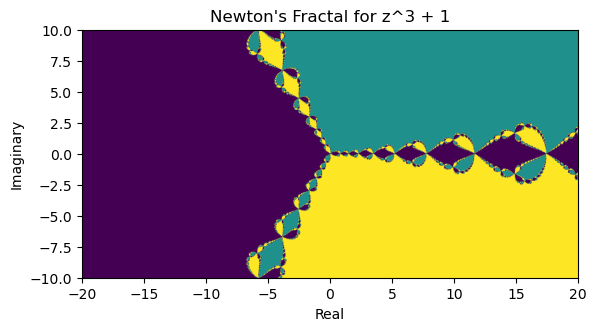

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def f(z):
    return z**3 + 1

def f_prime(z):
    return 3 * z**2

def newton_raphson(z0, f, f_prime, max_iter=100, tol=1e-6):
    z = z0
    for _ in range(max_iter):
        delta_z = f(z) / f_prime(z)
        z -= delta_z
        if abs(delta_z) < tol:
            break
    return z

real_min, real_max = -20, 20
imag_min, imag_max = -10, 10
resolution = 1000

real_range = np.linspace(real_min, real_max, resolution)
imag_range = np.linspace(imag_min, imag_max, resolution)
real_grid, imag_grid = np.meshgrid(real_range, imag_range)
z_grid = real_grid + 1j * imag_grid

roots_grid = np.zeros_like(z_grid, dtype=np.complex128)

for i in range(resolution):
    for j in range(resolution):
        roots_grid[i, j] = newton_raphson(z_grid[i, j], f, f_prime)

unique_roots, indices = np.unique(np.round(roots_grid, 6), return_inverse=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_roots)))
fractal_image = colors[indices].reshape(resolution, resolution, 4)

plt.imshow(fractal_image, extent=(real_min, real_max, imag_min, imag_max))
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Newton's Fractal for z^3 + 1")
plt.savefig("newtons_fractal.png")
plt.show()
